In [1]:
# importing required libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# importing iris flower data from sklearn 
from sklearn.datasets import load_iris
iris_data = load_iris()

In [3]:
# converting data into a pandas compatible dataFrame 
iris_df = pd.DataFrame(data=np.c_[iris_data['data'], iris_data['target']], columns=iris_data['feature_names'] + ['target'])

# Getting familiar with the Data 

After loading the data, the very first thing we can do is to look at the data. Exploring some insights of the data by looking 
at rows and columns(features). Most importantly, we need a cleaned data to further apply Expolatory data analysis and machine learning algorithms. 

In [4]:
# printing first few lines of the iris flower data 
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
# printing the concise summary of the dataframe such as index dtype, columns and non-null values
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [6]:
# alternative: usign '.isnull()' function checking if we have any null values in our dataset. 
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [7]:
# We are having 3 different iris flower species and they are encoded with class labels. We can change 
# this to categorical labels. This will help us in Expolatory data analysis 
iris_df['target'] = iris_df['target'].replace({0.0:'setosa', 1.0:'versicolor', 2.0:'virginica'})

In [8]:
# looking at some descriptive statistics
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# we can count up the unique values in 'target' column. 
iris_df['target'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64

This is a balanced dataset because class proportions are equal i.e. all classes contains equal number of samples. 

# Exploratory Data Analysis

With the help of EDA, we will analyze data and summarizes its main characteristcs. The main purpose is to help look at the data before making any assumptions. 
We can better understand patterns within the data or anamolous events.

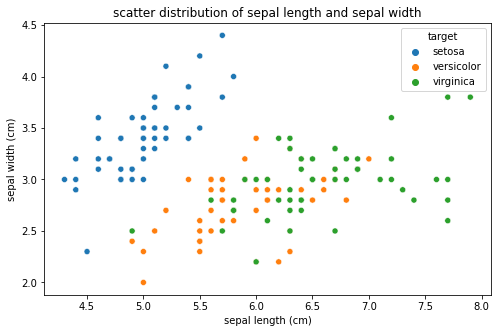

In [10]:
# we can plot a scatter plot and using hue as target variable
plt.figure(figsize=(8, 5))
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target')
plt.title('scatter distribution of sepal length and sepal width')
plt.show()

In this 2D scatter plot, 'setosa' is clearly separable from 'versicolor' and 'virginica' species.

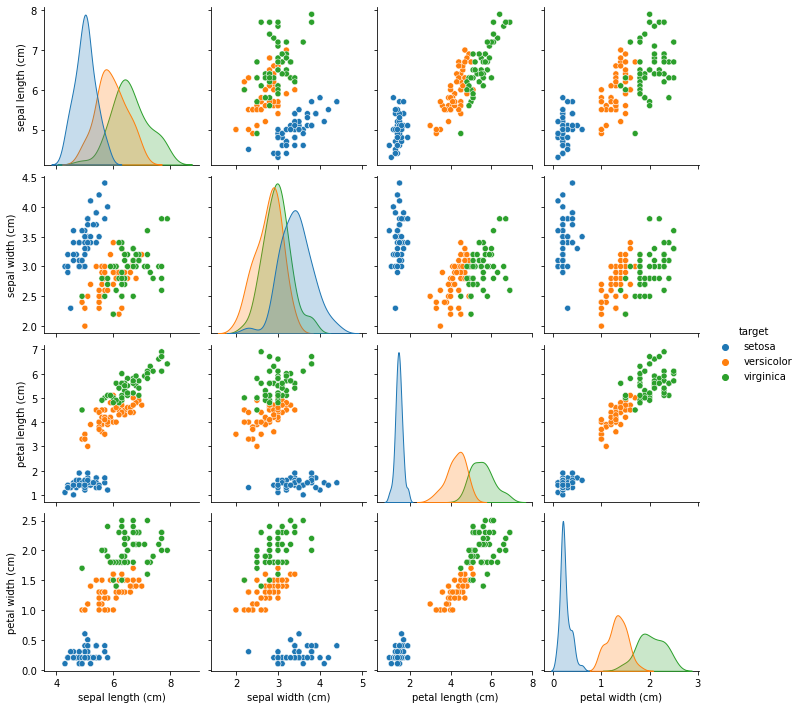

In [11]:
# using pair plot to check multiple features together 
sns.pairplot(iris_df, hue= 'target', kind='scatter')
plt.show()

Now it is more clearer that **'setosa'** specie is clearly separable from the other two species.

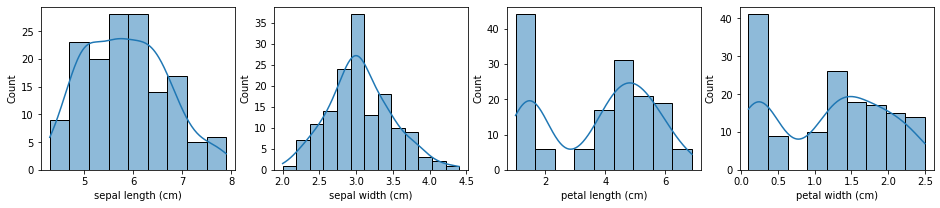

In [12]:
# plotting the distribution of the feature columns 

labels={0:'sepal length (cm)', 1:'sepal width (cm)', 2:'petal length (cm)', 3:'petal width (cm)'}

plt.figure(figsize=(16, 3))

for i in labels:
    plt.subplot(1, 4, i+1)
    sns.histplot(data=iris_df, x=labels[i], kde=True)
plt.show()

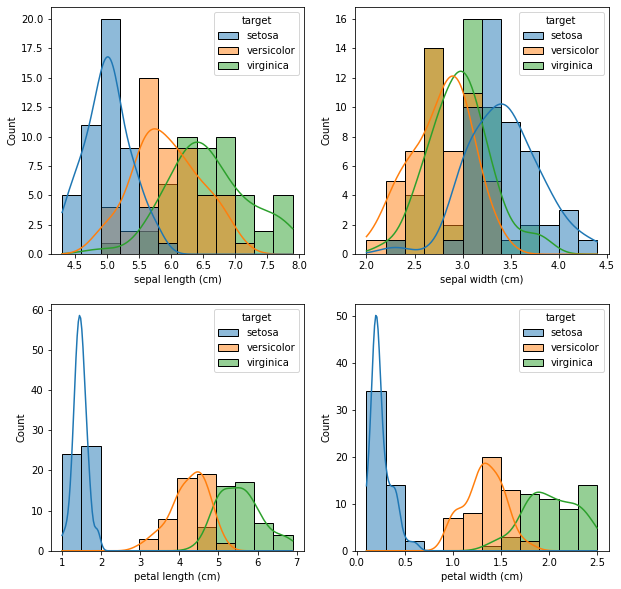

In [13]:
# we can check the distribution of the columns/features by plotting the histograms and smoothed KDE.
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.histplot(data=iris_df, x='sepal length (cm)', bins=12, hue=iris_df['target'], kde=True)
plt.subplot(2, 2, 2)
sns.histplot(data=iris_df, x='sepal width (cm)', bins=12, hue=iris_df['target'], kde=True)
plt.subplot(2, 2, 3)
sns.histplot(data=iris_df, x='petal length (cm)', bins=12, hue=iris_df['target'], kde=True)
plt.subplot(2, 2, 4)
sns.histplot(data=iris_df, x='petal width (cm)', bins=12, hue=iris_df['target'], kde=True)
plt.show()

We can make an assumption that the species are **Gaussian distributed**. To further confirm this we will do Statistical testing.  

# Statistical Testing

## Univariate Analysis 

In [22]:
iris_df['petal width (cm)'].describe()

count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal width (cm), dtype: float64

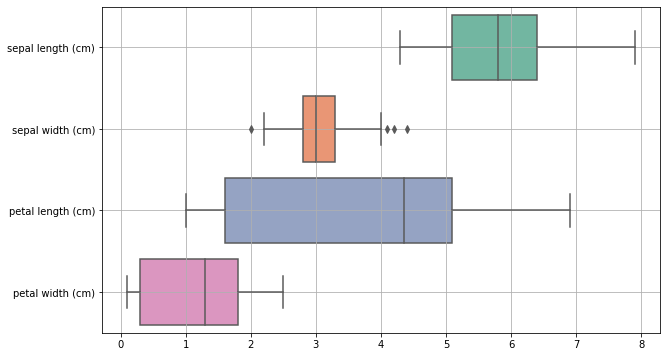

In [15]:
# we can make the box plot to measure the variability of the data  
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=iris_df, orient="h", palette="Set2")
plt.grid(True)

Box plot depicts five summary points: min value, 1st quartile, 2nd quartile, 3rd quartile and the max value. It also tells if your data is symmetrical,skewed and how much data is tightly grouped.
* sepal length data is nearly symmetrical (to further confirm this e will check skewness). 
* sepal width data is tightly packed. Moreover this data also contains some outliers (we can throw them out).
* petal length has higher data variability, left skewed and contains lack of symmetry. 
* petal width has left skewed distribuution.

In [16]:
# we can check the degree of asymmetry of a dataset/measuring skewness
labels = {0:'sepal length (cm)', 1:'sepal width (cm)', 2:'petal length (cm)', 3:'petal width (cm)'}
 
for i in labels:
    print('skewness of {} is {:.2f}'.format(labels[i], iris_df[labels[i]].skew()))

skewness of sepal length (cm) is 0.31
skewness of sepal width (cm) is 0.32
skewness of petal length (cm) is -0.27
skewness of petal width (cm) is -0.10


skewness value is in between -0.5 to 0.5, the distribution is considered to be approximately symmetric. 

In [17]:
# we can also measure the tailness of the distribution by computing the kurtosis 
for i in labels:
    print('kurtosis of {} is {:.2f}'.format(labels[i], iris_df[labels[i]].kurt()))

kurtosis of sepal length (cm) is -0.55
kurtosis of sepal width (cm) is 0.23
kurtosis of petal length (cm) is -1.40
kurtosis of petal width (cm) is -1.34


sepal length and sepal width are close to the normal distribution because the excess kurtosis is close to the 0. The negative value indicates that **sepal length** is slightly tends to be platykurtic while positive value indicates **sepal width** slightly tends to be leptokurtic. 
<br>
<br>
petal length and petal width are bimodal distributions(this can also observe from the histograms and numerical values). Significant skewness and kurtosis clearly indicate that data are not normal.

## Bivariate Analysis 

In bivariate analysis, we can check the relationship between the two variables, how they are changing or effecting each other. 

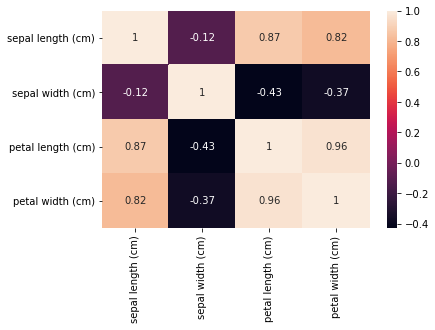

In [28]:
# we can plot the heat map to check the correlation between the features 
sns.heatmap(iris_df.iloc[:, :4].corr(), annot=True)
plt.show()

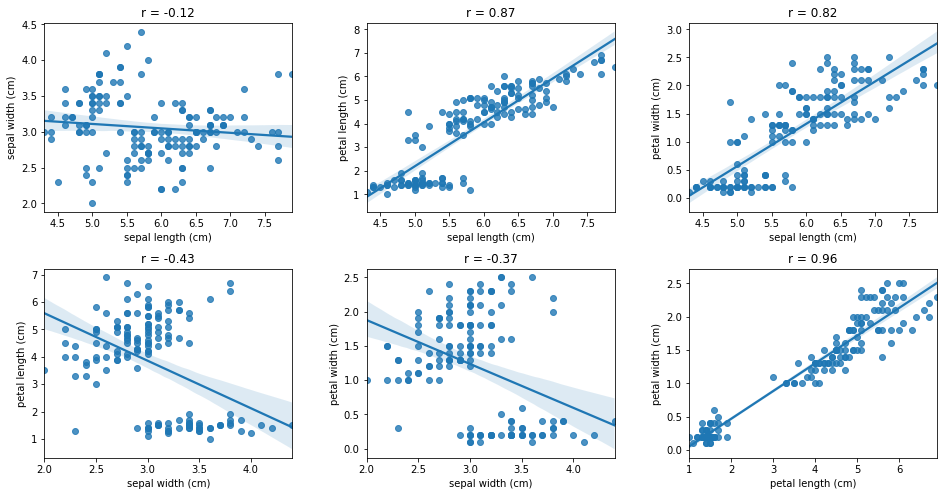

In [83]:
# we can go one step deeper and to anaylse what actually above correlation coefficients means
from scipy import stats
fig = plt.figure(figsize=(16, 8))
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)

plt_labels = {0: 'sepal length (cm)', 1:'sepal width (cm)', 2:'petal length (cm)', 3:'petal width (cm)'}
n =1

for i in plt_labels:
    for j in range(i+1, len(plt_labels)):
        ax=fig.add_subplot(2, 3, n)
        sns.regplot(x=plt_labels[i], y=plt_labels[j], data=iris_df)
        plt.title('r = '+str(round(stats.pearsonr(iris_df[plt_labels[i]], iris_df[plt_labels[j]])[0], 2)))
        n=n+1

plt.show()

The pearson correlation coefficient assess the linear relationship between the two variables. The following things have observed:
* sepal length and petal length have strong positive correlation. Petal length is linearly related with sepal length. 
* petal length and petal width are really high positive correlation. petal length increases have an effect on an increase in the petal width. 
* sepal length and sepal width does not have linear relationship. Increase in sepal length does not mean higher will be sepal width.

# Summary

The iris flower data consists of 50 samples from 3 different species of iris flower namely setosa, versicolor and virginica. The data set composed of 4 numerical/input features and 1 categorical feature/target variable. Input features are sepal length, sepal width, petal length and petal width whereas target variable is species. Following insights have been found from the analysis: 
<br>
<br>
* Iris Setosa has very narrow petal length and moderate petal width (observed from histogram plots)
* Iris Setosa has smaller sepal length compared to iris versicolor and virginica while setosa has wide sepal width compared with other two.
* Iris versicolor and virginica has indistinguishable sepal width meaning they are having almost the same sepal width. 
* Iris virginica has larger petal length and petal width but their distribution has higher variability. 
<br>
* Sepal length and sepal width has nearly normal distribution. But petal length and petal width are bi-modal this is due to the narrow distribution of the petal length and width of the iris setosa.